### **Codsoft Task 5**




**Credi Card Fraud Detection**





In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Required Libraries**

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#To avoid warnings
import warnings
warnings.filterwarnings('ignore')


Uploading File

In [34]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Dataset information**

In [35]:
#Checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [36]:
#Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [37]:
print(f"no.of rows = {df.shape[0]}")
print(f"no.of columns = {df.shape[1]}")

no.of rows = 284807
no.of columns = 31


In [54]:
#Statistical measures of the data
df.describe().T



,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


from matplotlib import pyplot as plt
_df_32['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_44['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [39]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

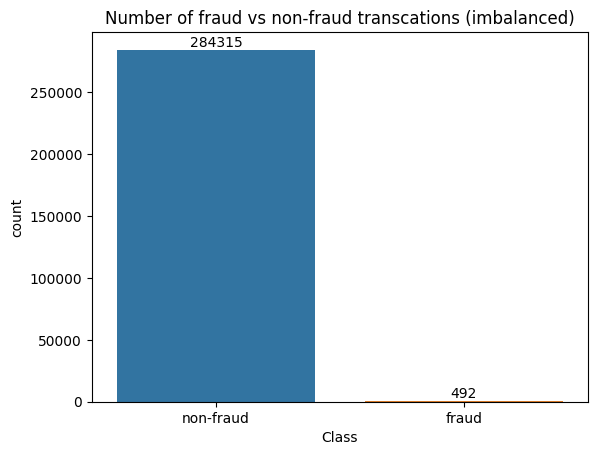

In [40]:
#Countplot
splot = sns.countplot(x = 'Class', data = df)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')
plt.title('Number of fraud vs non-fraud transcations (imbalanced)')
plt.xticks(range(2) , labels=['non-fraud', 'fraud'])
plt.show()

From the plot we can see that the data is highly imbalanced. This cause the model to be **biased**.

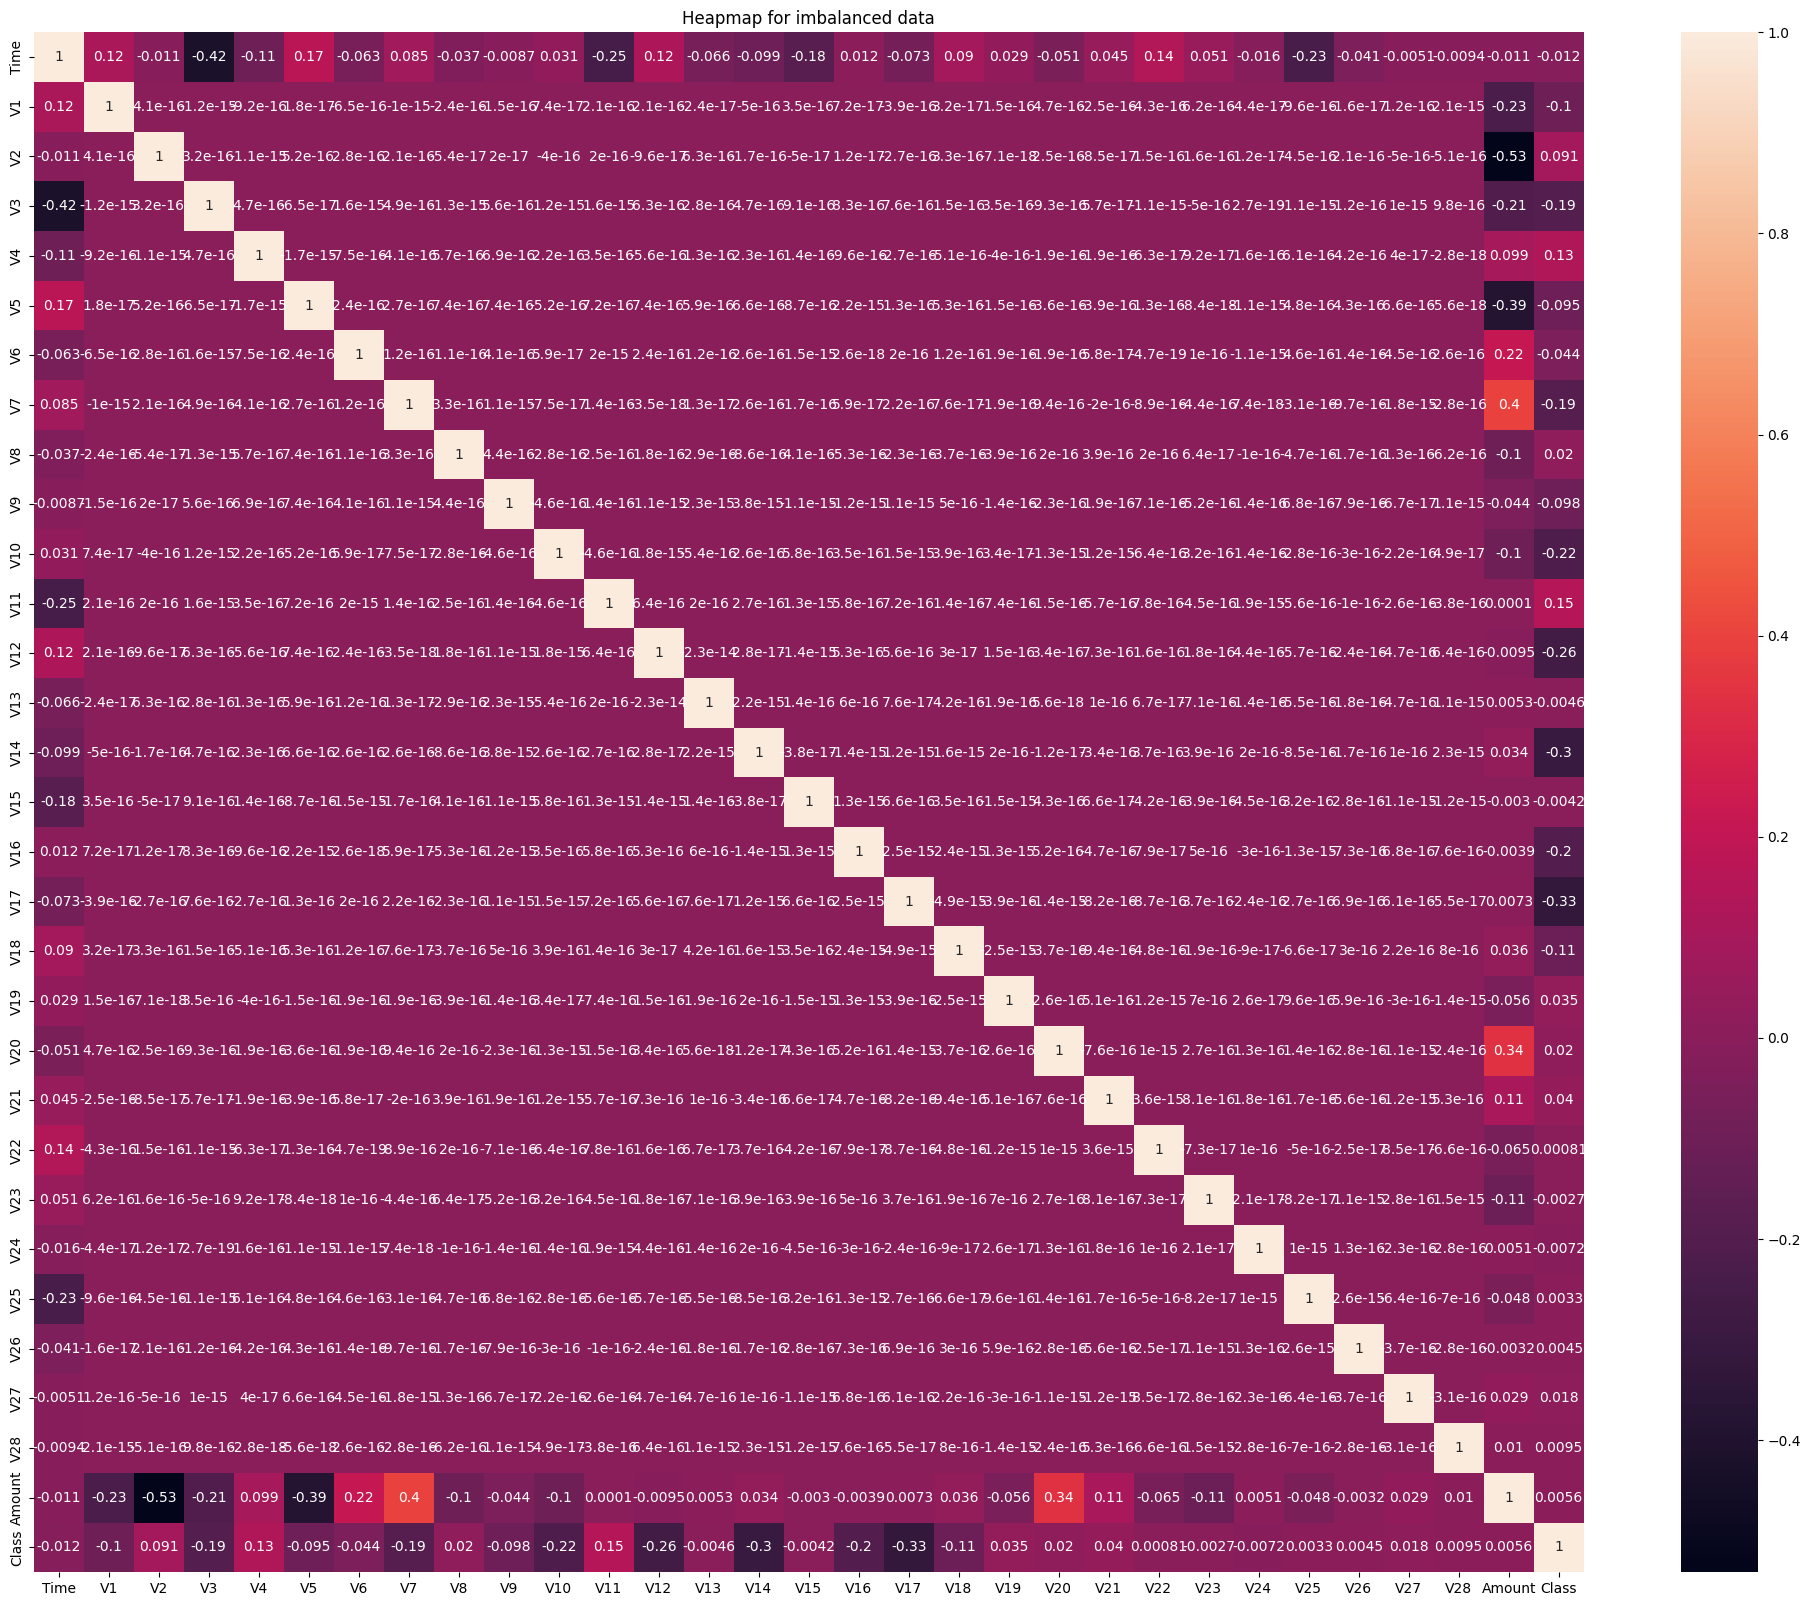

In [41]:
#heatmap
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True)
plt.title("Heapmap for imbalanced data")
plt.show()

In [42]:
#Spliting the data according to class column
non_fraud = df.loc[df['Class'] == 0]
fraud = df.loc[df['Class'] == 1]

#Printing the shape(rows, columns) of non-fraud and fraud dataset.
print('Non-Fraudulent Transcations: ', non_fraud.shape)
print('Fraudulent Transcations: ', fraud.shape)

Non-Fraudulent Transcations:  (284315, 31)
Fraudulent Transcations:  (492, 31)


In [43]:
non_fraud_sample = non_fraud.sample(n = 492)
print('Sample Non-Fraudlent Transcations: ', non_fraud_sample.shape)

Sample Non-Fraudlent Transcations:  (492, 31)


In [44]:
#Creating new dataframe using the sample non-fraud data.
new_df = pd.concat([non_fraud_sample, fraud], ignore_index = True)
new_df



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,75147.0,1.374032,-0.395190,0.454913,-0.584871,-1.032004,-1.017790,-0.364178,-0.296536,-1.014951,...,-0.469446,-0.855700,0.121906,0.436278,0.130816,0.899144,-0.049416,0.015359,17.24,0
1,84106.0,-5.878121,5.049879,-3.046211,-0.102171,-3.649401,-1.575222,-2.932248,4.291463,-0.378162,...,-0.074032,-0.910681,0.552184,0.325014,0.497883,0.132076,-0.038260,0.026190,9.42,0
2,121315.0,1.507267,-1.470902,-0.640045,-0.402344,-1.192388,-0.681770,-0.295321,-0.209536,1.600399,...,0.334878,0.674809,-0.080845,0.109568,-0.376288,0.707687,-0.071086,-0.004218,276.00,0
3,73818.0,-1.100335,-0.304878,1.227115,-4.442457,-0.517210,0.451632,-0.084125,0.570748,0.733399,...,-0.113930,0.465338,-0.015284,-0.665949,-0.185393,-1.010778,-0.166684,-0.180598,39.99,0
4,62321.0,1.202882,-0.801690,-0.747624,-1.852391,1.251438,3.479015,-1.117979,0.947331,1.703641,...,0.116211,0.350717,-0.214201,1.046279,0.768784,-0.521482,0.088140,0.035340,53.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [45]:
print(f"no.of rows = {new_df.shape[0]}")
print(f"no.of columns = {new_df.shape[1]}")

no.of rows = 984
no.of columns = 31


In [46]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

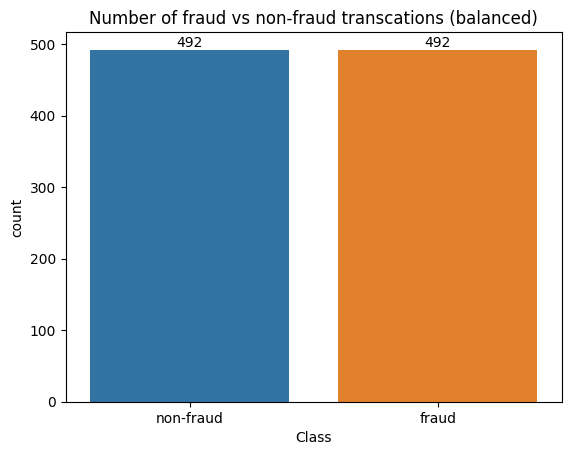

In [47]:
#Countplot
splot = sns.countplot(x = 'Class', data = new_df)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')
plt.title('Number of fraud vs non-fraud transcations (balanced)')
plt.xticks(range(2) , labels=['non-fraud', 'fraud'])
plt.show()

We can see the data is completly balanced now

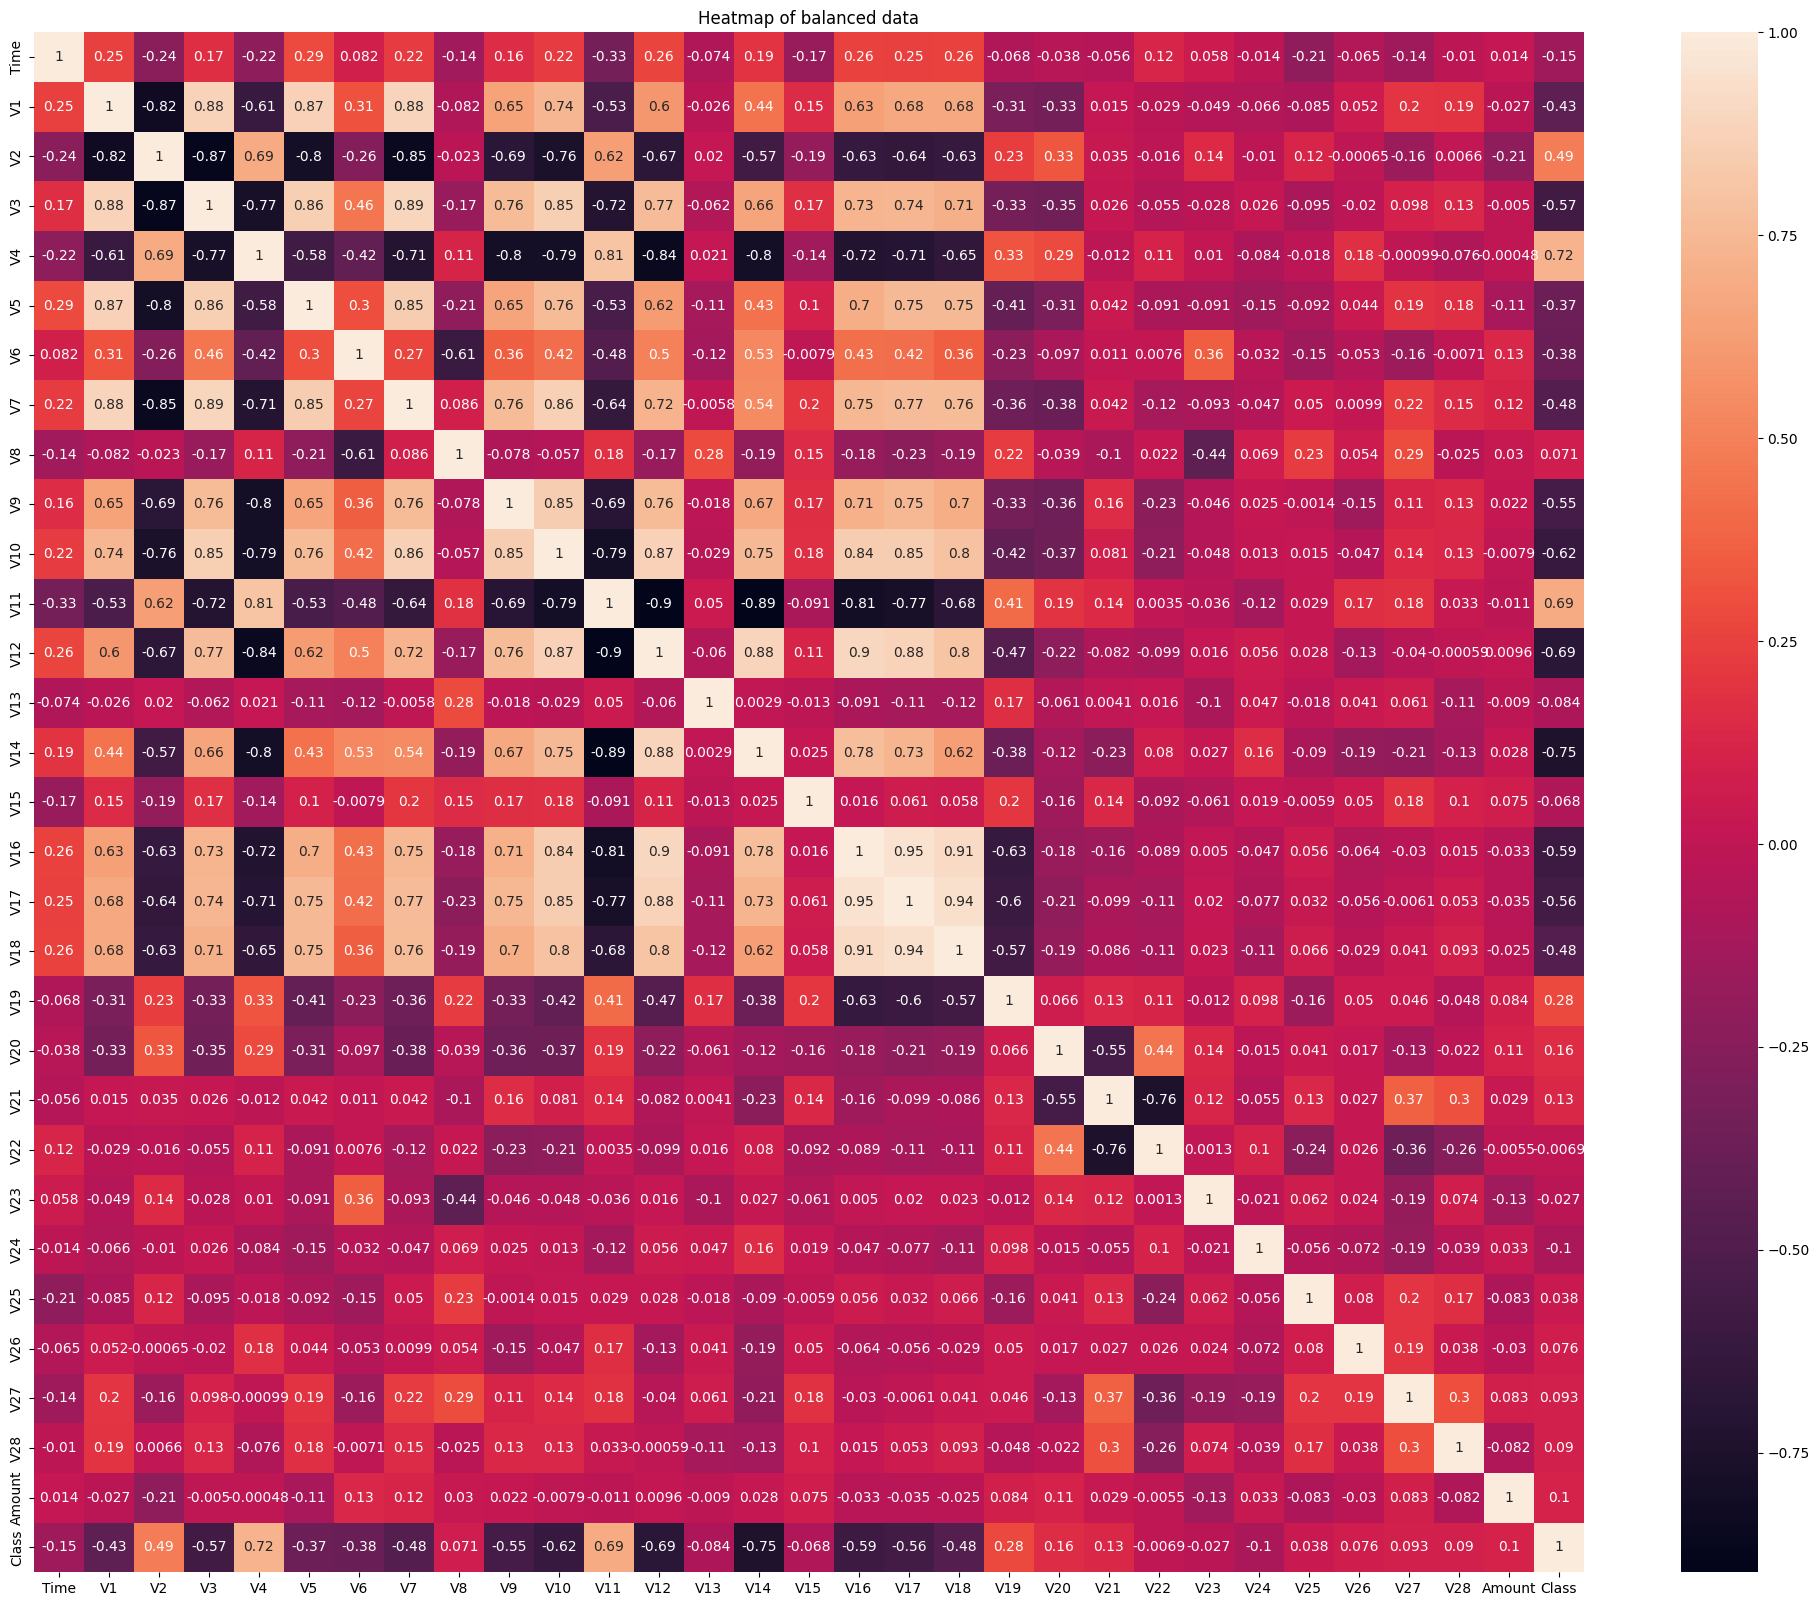

In [48]:
#heatmap
plt.figure(figsize = (25,20))
sns.heatmap(new_df.corr(), annot = True)
plt.title("Heatmap of balanced data")
plt.show()


Spliting the data

In [49]:
x = new_df.drop('Class', axis = 1) #Features
y = new_df['Class'] #Target


**Train Test Spliting**

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42,stratify = y)

print(x_train.shape, x_test.shape)

(787, 30) (197, 30)


**Model Building**


In [51]:
#model building
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

y_pred1 = log_reg.predict(x_test)
y_pred2 = rf_clf.predict(x_test)

In [52]:
#classification report for logistic regression
print(f"{' '*18}Logistic Regression Report\n")
print(classification_report(y_test, y_pred1))

                  Logistic Regression Report

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.95      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [53]:
#classification report for random forest classifier
print(f"{' '*16}Random Forest Classifier Report\n")
print(classification_report(y_test, y_pred2))

                Random Forest Classifier Report

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



In summary, the Logistic Regression and Random Forest Classifier model has proven effective in credit card fraud detection, providing a balance of accuracy and simplicity.